In [1]:
from datetime import datetime, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
#matplotlib.style.use('ggplot')
import seaborn as sns
%pylab inline --no-import-all
#The old %matplotlib inline activates the inline backend, which renders figures in the notebook as static pngs.
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Contexte graphique de Seaborn
#sns.set_palette("Reds")
#sns.set_palette("Blues_d")
#sns.set(context='poster', palette='Reds')
sns.set(context='poster')

# Génération des graphiques des mesures Zabbix

In [3]:
# Répertoire de sauvegarde des graphiques générés
#graph_dir = 'D:\\Users\\PYLS12691\\Documents\\2-Campagnes_en_cours\\CROSS-IR_SHOS\\batchs_qualif_20160811\\zabbix_graphs\\'
graph_dir = 'zabbix_graphs\\'

In [4]:
# Fichier csv de sortie des indicateurs et leurs mesures
csv_file = 'resultats_indicateurs.csv'
monitors = pd.read_csv(csv_file, sep = ';', header=[0,1,2], index_col=0)
monitors.head()

D:\Users\PYLS12691\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (36,48,50,51,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


U000ODI11                         \
                             Available memory            CPU $2 time   
                    vm.memory.size[available] system.cpu.util[,idle]   
datetime                                                               
2016-08-29 13:00:00                       NaN                    NaN   
2016-08-29 13:00:01                       NaN                    NaN   
2016-08-29 13:00:01                       NaN                    NaN   
2016-08-29 13:00:02                       NaN                    NaN   
2016-08-29 13:00:02                       NaN                    NaN   

                                                                          \
                                                                           
                    system.cpu.util[,interrupt] system.cpu.util[,iowait]   
datetime                                                                   
2016-08-29 13:00:00                         NaN                      NaN   
2016-08-29 13:00:01                         NaN                      NaN   
2016-08-29 13:00:01                         NaN                      NaN   
2016-08-29 13:00:02                         NaN                      NaN   
2016-08-29 13:00:02                         NaN                      NaN   

                                                                      \
                                                                       
                    system.cpu.util[,nice] system.cpu.util[,softirq]   
datetime                                                               
2016-08-29 13:00:00                    NaN                       NaN   
2016-08-29 13:00:01                    NaN                       NaN   
2016-08-29 13:00:01                    NaN                       NaN   
2016-08-29 13:00:02                    NaN                       NaN   
2016-08-29 13:00:02                    NaN                       NaN   

                                                                      \
                                                                       
                    system.cpu.util[,steal] system.cpu.util[,system]   
datetime                                                               
2016-08-29 13:00:00                     NaN                      NaN   
2016-08-29 13:00:01                     NaN                      NaN   
2016-08-29 13:00:01                     NaN                      NaN   
2016-08-29 13:00:02                     NaN                      NaN   
2016-08-29 13:00:02                     NaN                      NaN   

                                                                    \
                                           CPU nb of processor max   
                    system.cpu.util[,user]     system.cpu.num[max]   
datetime                                                             
2016-08-29 13:00:00                    NaN                     NaN   
2016-08-29 13:00:01                    NaN                     NaN   
2016-08-29 13:00:01                    NaN                     NaN   
2016-08-29 13:00:02                    NaN                     NaN   
2016-08-29 13:00:02                    NaN                     NaN   

                                                     ...                                   \
                                                     ...                                    
                                                     ...                                    
datetime                                             ...                                    
2016-08-29 13:00:00                                  ...                                    
2016-08-29 13:00:01                                  ...                                    
2016-08-29 13:00:01                                  ...                                    
2016-08-29 13:00:02                                  ...                                    
2016-08-29 13:00:02          

In [5]:
monitors.columns[0]

('U000ODI11', 'Available memory', 'vm.memory.size[available]')

## Génération des graphes associés à chacun des indicateurs

In [6]:
for col in monitors.columns :
    graph_values = pd.Series(monitors[col]).dropna()
    if not(graph_values.empty) and type(graph_values[0]) != str :
        graph_title = '[' + col[0] + '] - ' + col[1] + ', ' + col[2]
        #graphe_title = graphe_title.translate ({ord(c): "_" for c in "!@#^&*(){};:,/<>?\|`~-=+"})
        graph_title = graph_title.translate({ord(c): "_" for c in ":/\""})
        #plt.figure()
        graph_values.plot(title = graph_title, figsize=(14, 5))
        plt.xticks(rotation=10)
        plt.savefig(graph_dir + graph_title + '.png')
        plt.close()

## Génération des graphes indicateurs communs aux serveurs

D:\Users\PYLS12691\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


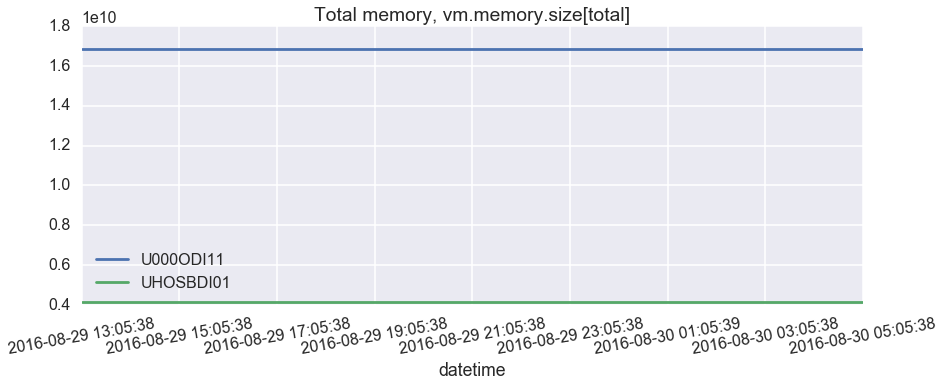

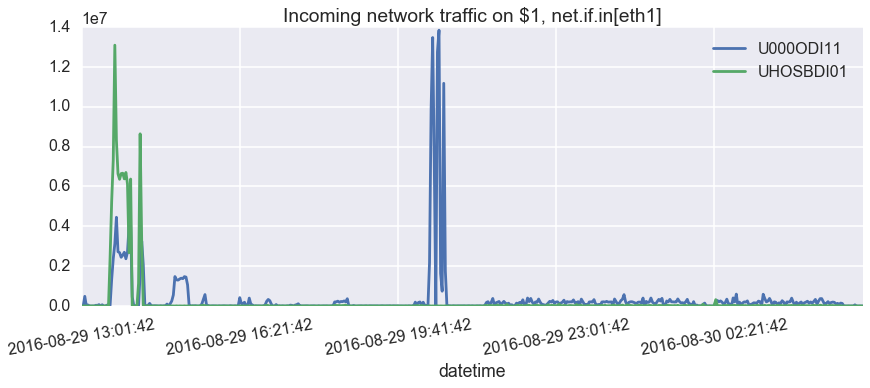

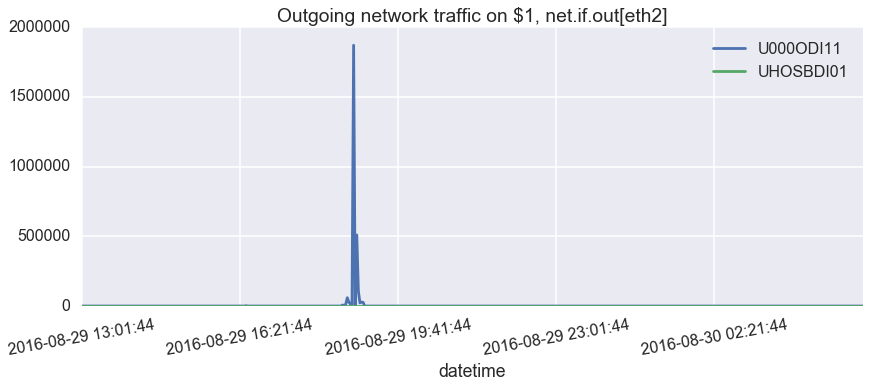

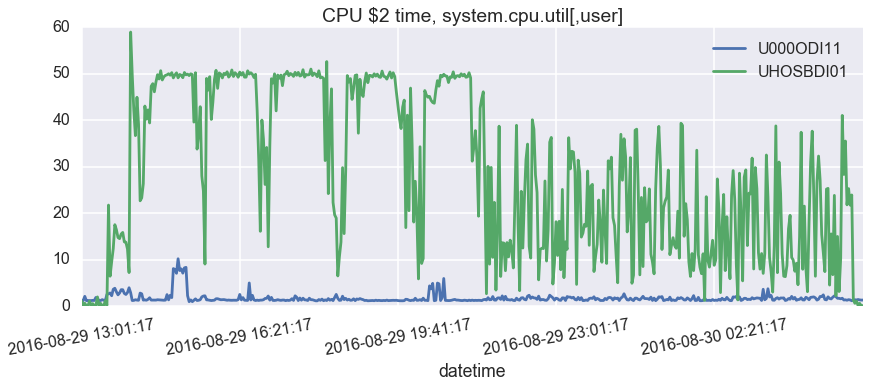

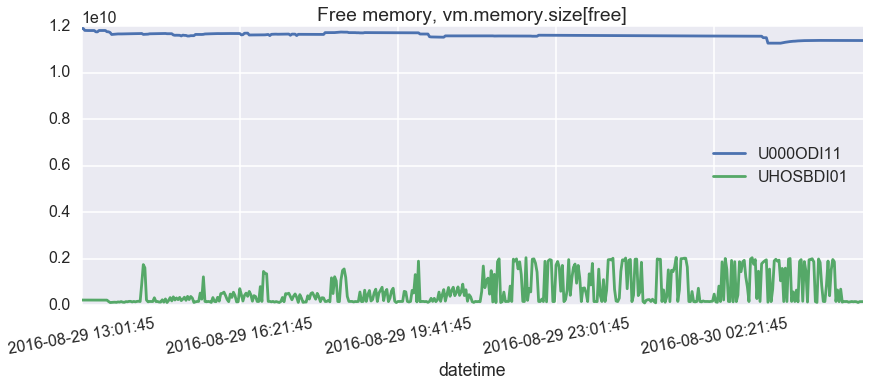

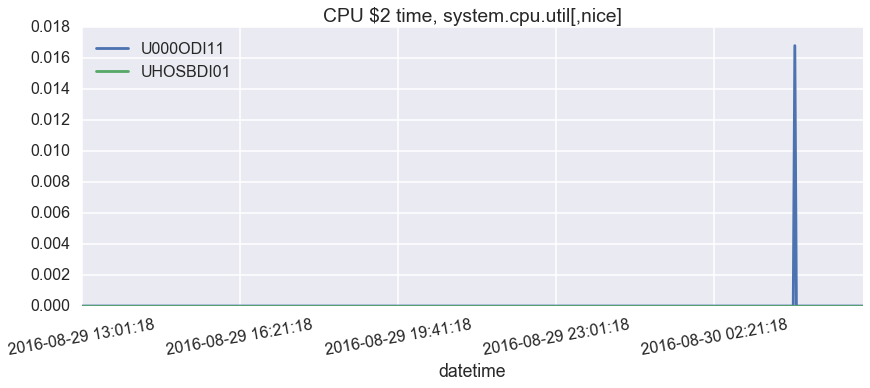

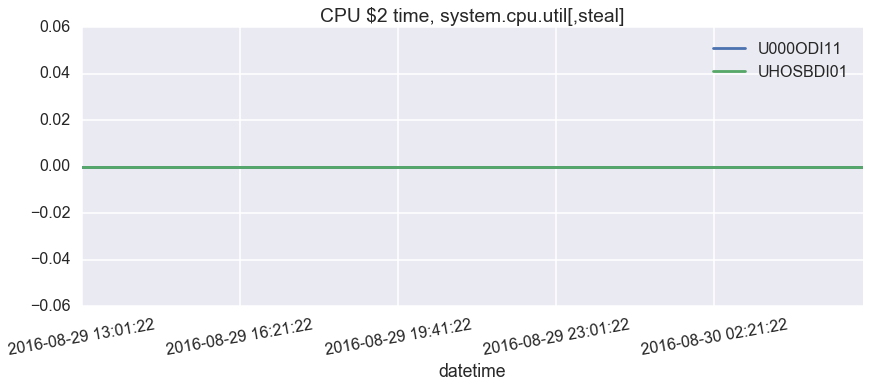

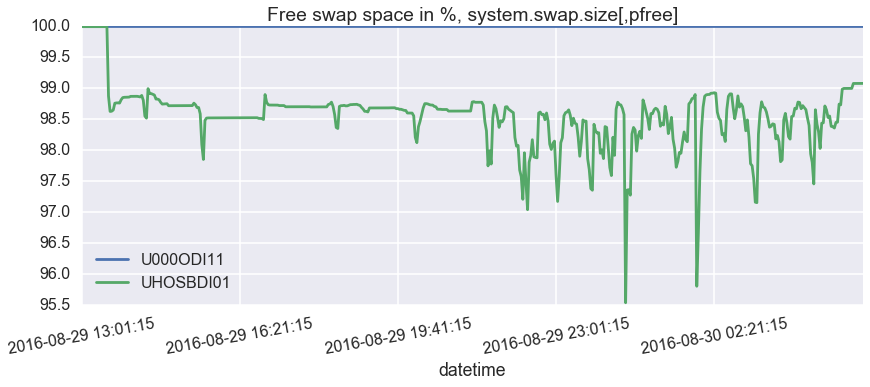

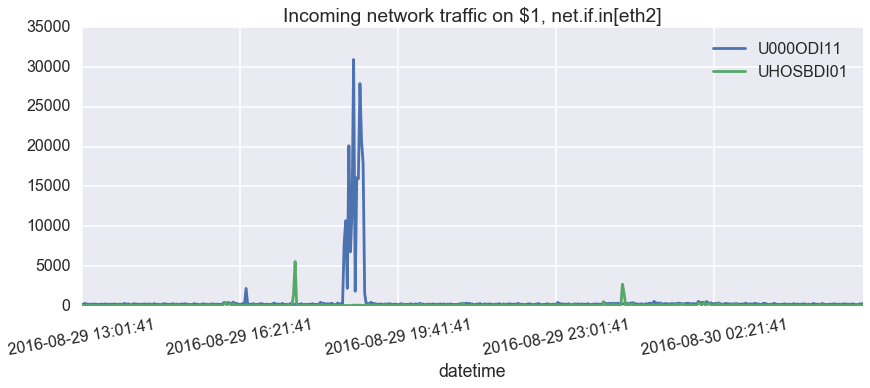

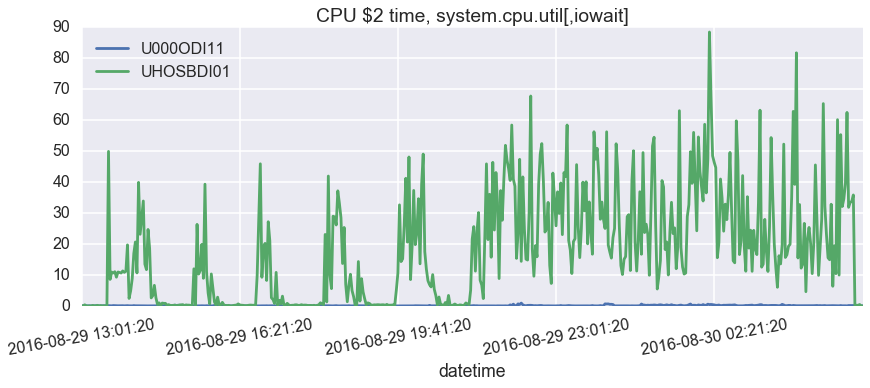

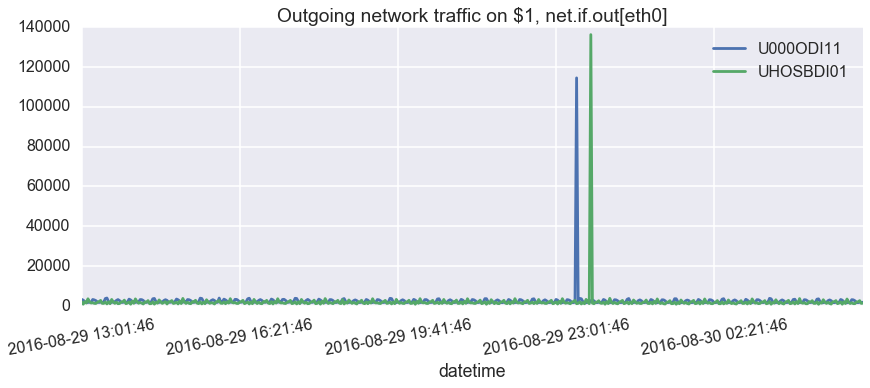

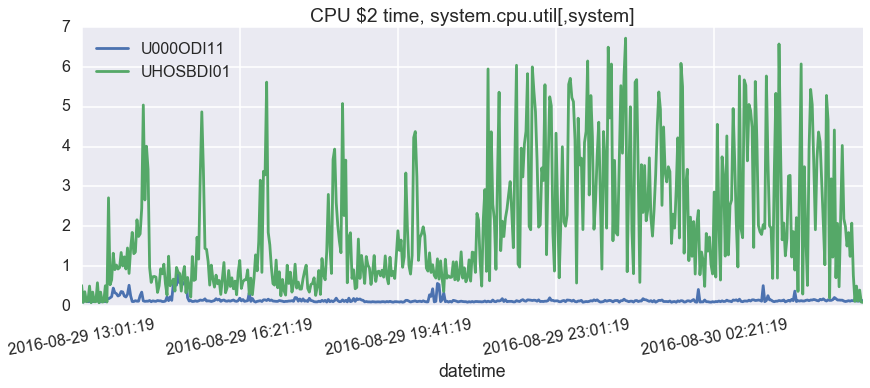

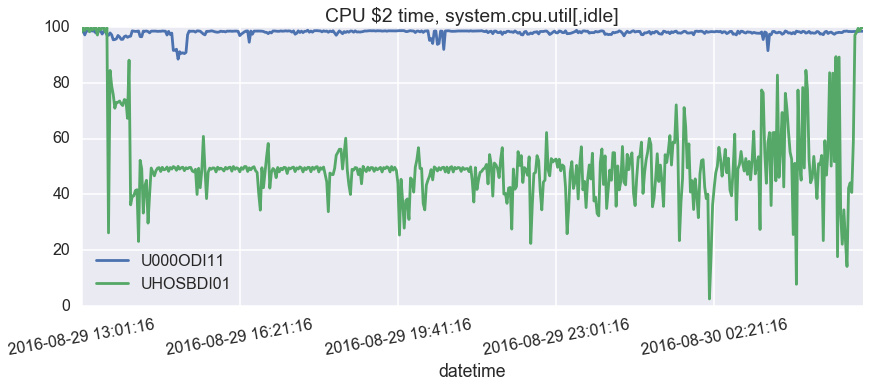

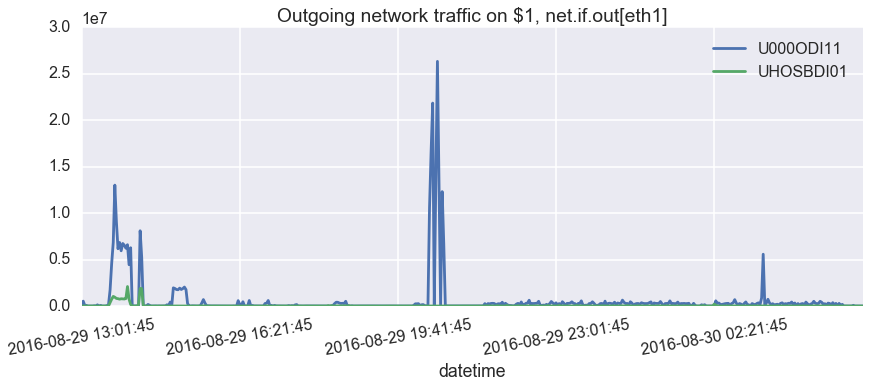

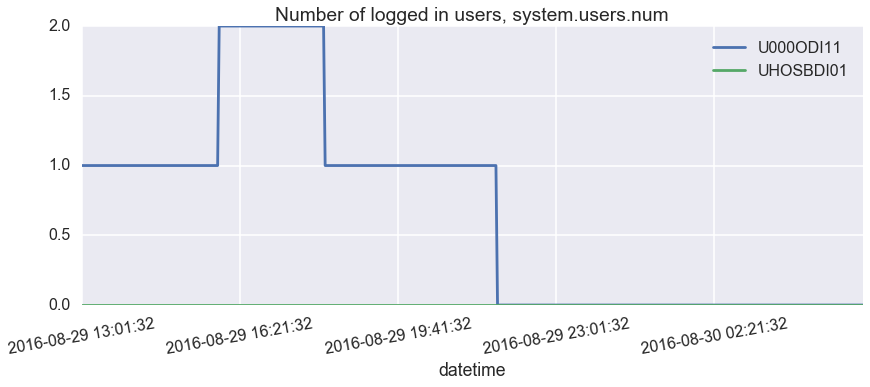

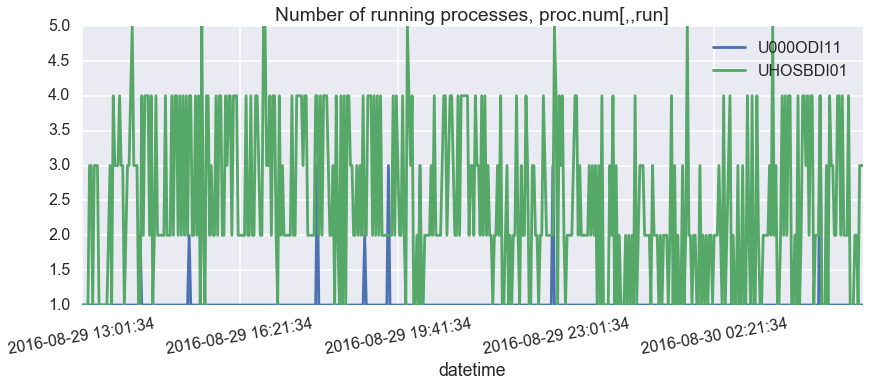

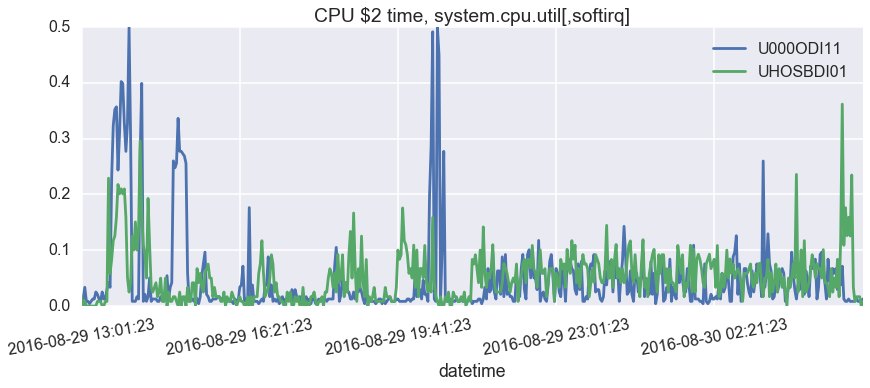

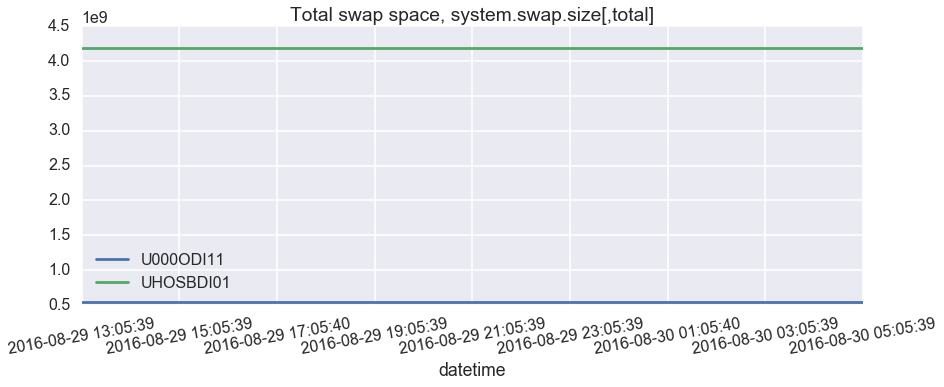

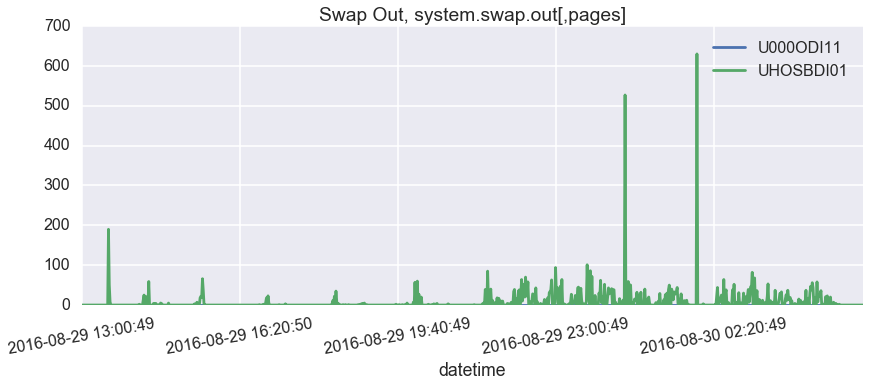

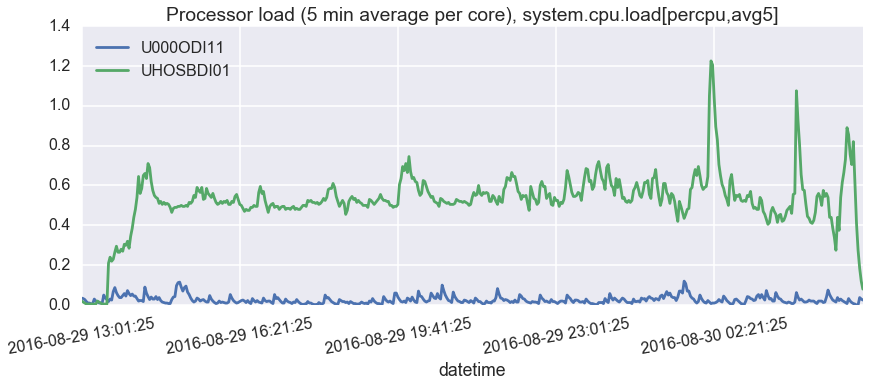

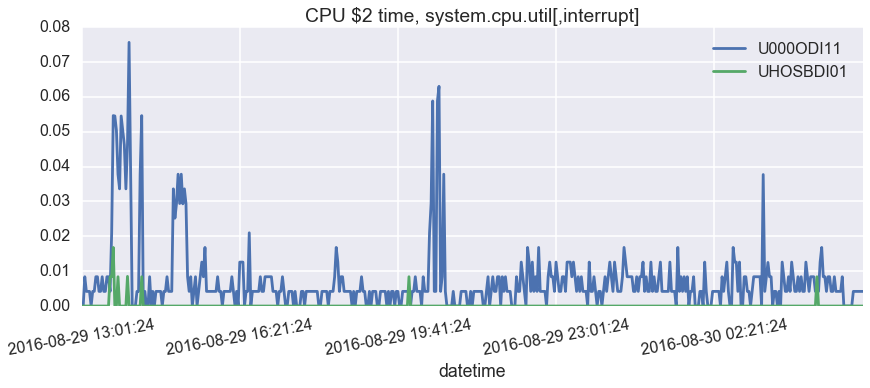

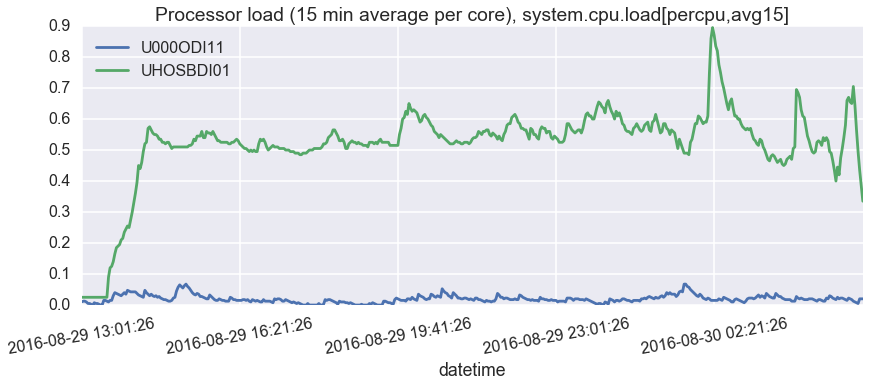

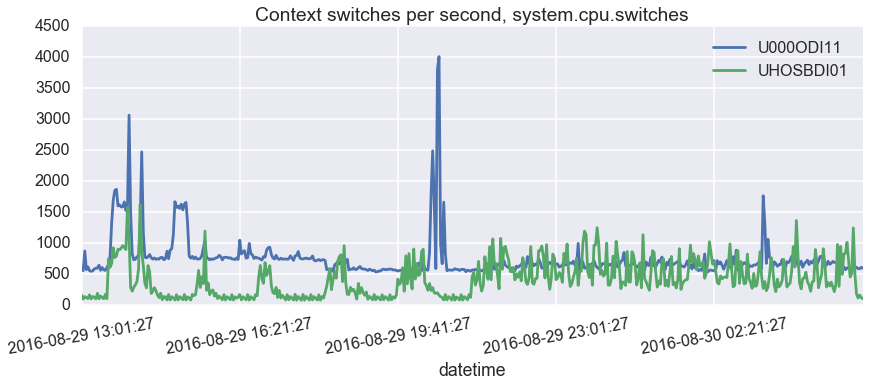

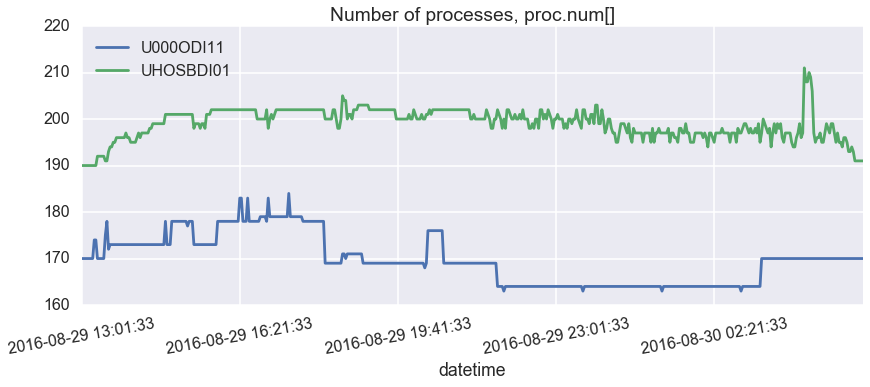

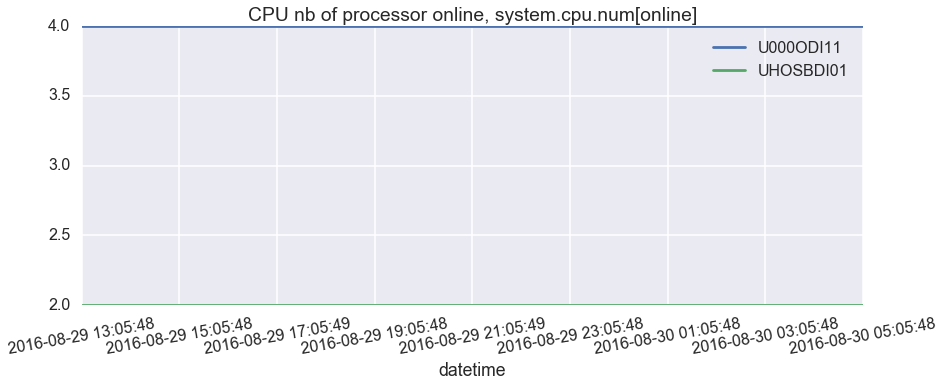

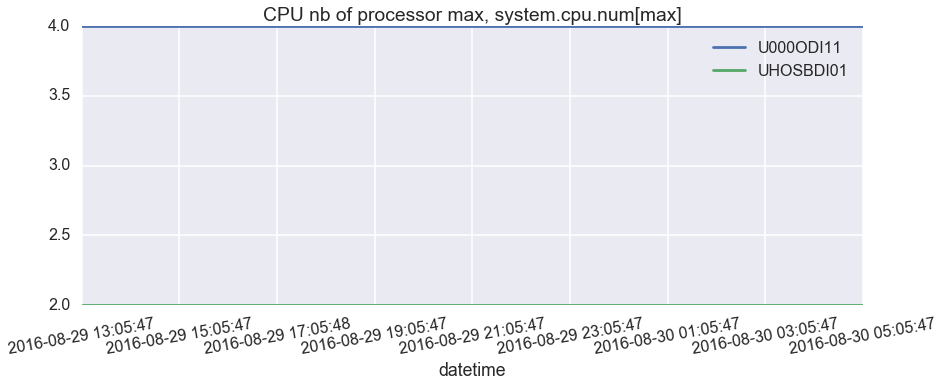

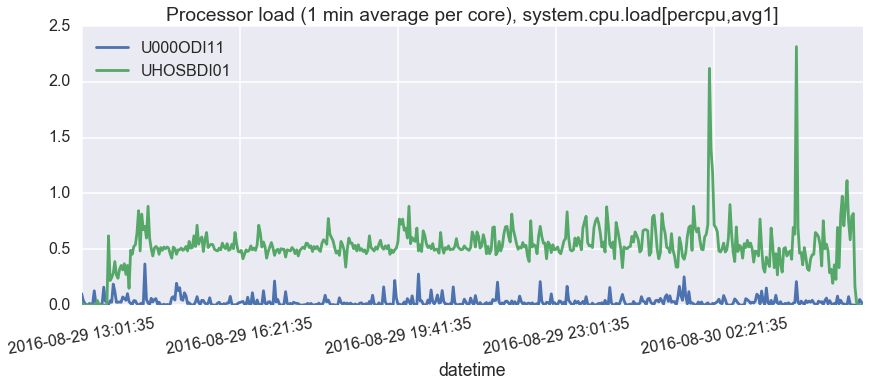

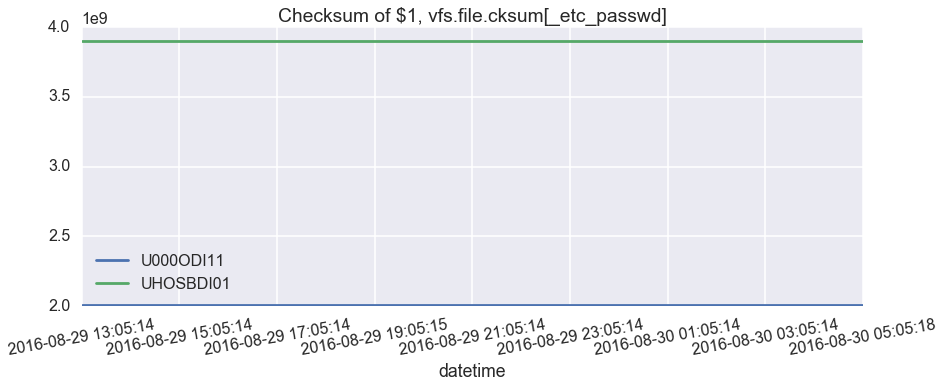

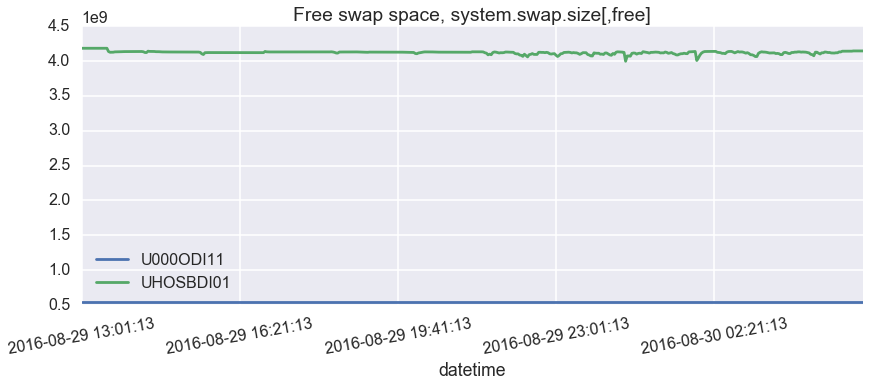

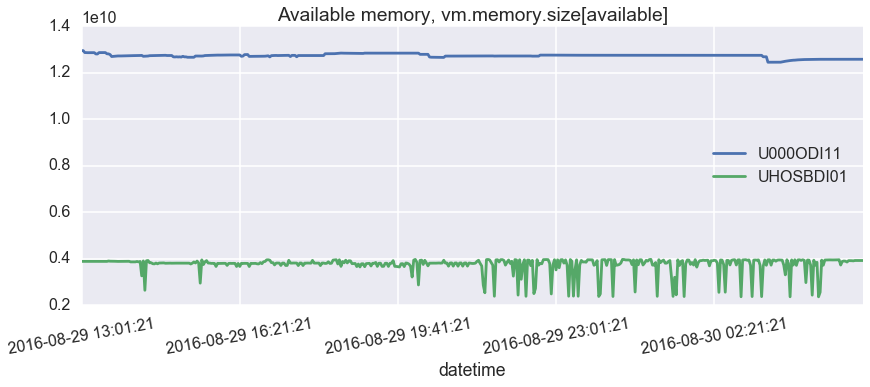

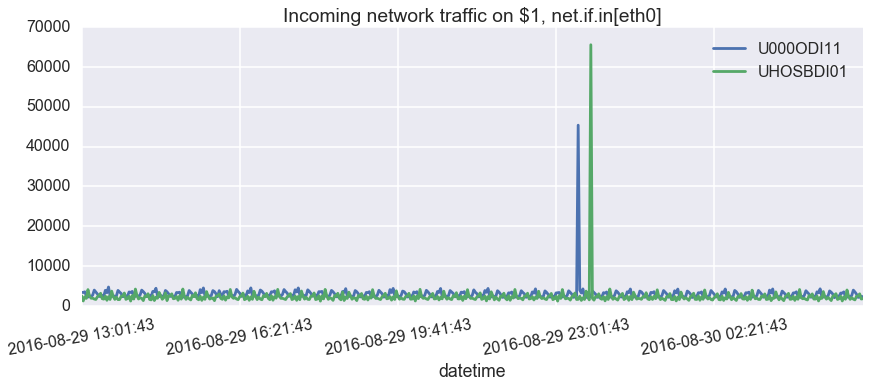

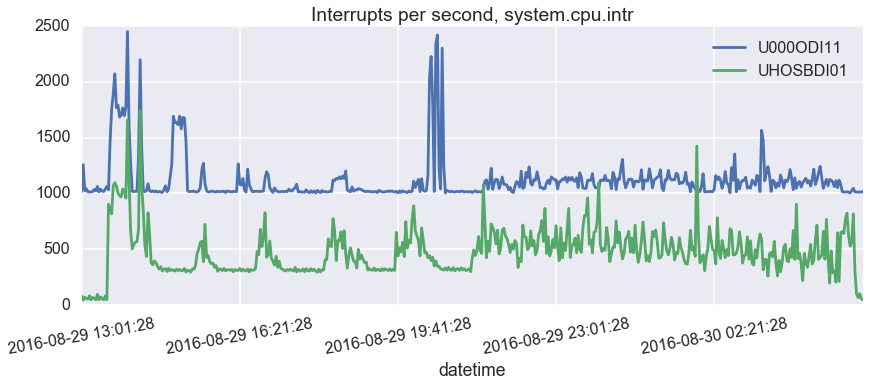

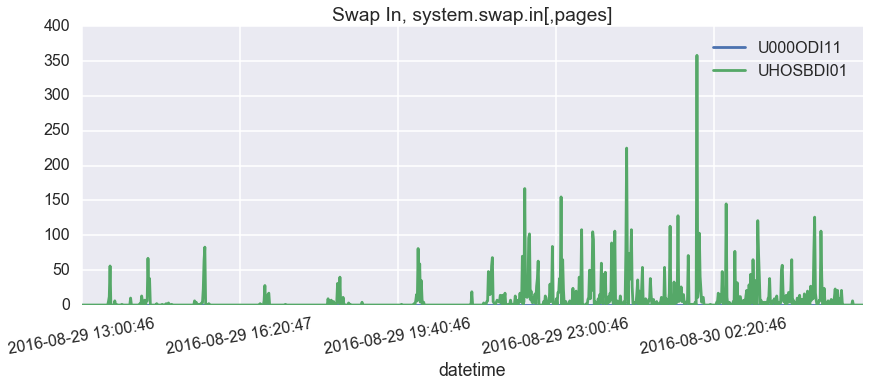

In [7]:
# Détermination des indicateurs portant sur plusieurs hosts
items = {}
for col in monitors.columns :
    if col[2] in items.keys() :
        items[col[2]].append(col)
    else :
        items[col[2]] = [col]
    
mult_items = []
for k in items.keys() :
    if len(items[k]) > 1 :
        mult_items.append(items[k])
        
# Génération des graphiques sur les indicateurs portant sur plusieurs serveurs
for mi in mult_items :
    fig = plt.figure()
    legends = [col[0] for col in mi]
    for col in mi :
        graph_values = pd.Series(monitors[col]).dropna()
        graph_title = col[1] + ', ' + col[2]
        graph_title = graph_title.translate({ord(c): "_" for c in ":/\""})
        graph_values.plot(title = graph_title, label=col[0], figsize=(14, 5))
    plt.xticks(rotation=10)
    plt.legend(legends, loc = 'best')
    plt.savefig(graph_dir + graph_title + '.png')
    #plt.savefig(graph_dir + graph_title + '.svg')
    #plt.close()

In [8]:
#sns.pairplot(monitors)

In [9]:
from bokeh.charts import TimeSeries, output_file, show

In [10]:
m = monitors.columns[0]
fig = TimeSeries(monitors[m],x='datetime', y='CPU')
show(fig)

ValueError: expected an element of either Column Name or Column String or List(Column Name or Column String), got [('U000ODI11', 'Available memory', 'vm.memory.size[available]')]